In [1]:
import pandas as pd
import sqlite3 as sql

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# DB file
db_file = '../sqlite_immigration_italienne.sqlite'


# create a connection
cn = sql.connect(db_file)


## Arrivées par genre

In [4]:
query="""
SELECT SUBSTRING(min_date_permis,1,4) annee_arrivee, genre
FROM v_personne_avec_proprietes_agg
WHERE min_date_permis NOTNULL
ORDER BY annee_arrivee; 
"""

In [5]:
# Create a cursor
cur = cn.cursor()
cur.execute(query)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()

In [7]:
personnes = pd.DataFrame(r)
personnes.columns=['annee_arrivee', 'genre']
personnes.tail()

,annee_arrivee,genre
342,1870,homme
343,1870,homme
344,1870,homme
345,1870,homme
346,1870,homme


In [8]:


### Tableau de contingence
X = "annee_arrivee"
Y = "genre"  # "0"

ddf = personnes[[X,Y]].pivot_table(index=Y,columns=X,observed=True, aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int).transpose()
ddf = ddf[:-1]
ddf



genre,femme,homme,Total
annee_arrivee,,,
1848,3,33,36
1849,8,28,36
1850,0,14,14
1851,5,8,13
1852,3,10,13
1853,1,18,19
1854,0,4,4
1855,1,4,5
1856,2,20,22


In [10]:
ddf['f_p'] = ddf.apply(lambda x : (x.femme/x.Total).round(1), axis=1)
ddf['h_p'] = ddf.apply(lambda x : (x.homme/x.Total).round(1), axis=1)
ddf

genre,femme,homme,Total,f_p,h_p
annee_arrivee,,,,,
1848,3,33,36,0.1,0.9
1849,8,28,36,0.2,0.8
1850,0,14,14,0.0,1.0
1851,5,8,13,0.4,0.6
1852,3,10,13,0.2,0.8
1853,1,18,19,0.1,0.9
1854,0,4,4,0.0,1.0
1855,1,4,5,0.2,0.8
1856,2,20,22,0.1,0.9


In [16]:
lp = ddf['h_p'].to_list()+ddf['f_p'].to_list()
print(lp[:3])

[0.9, 0.8, 1.0]


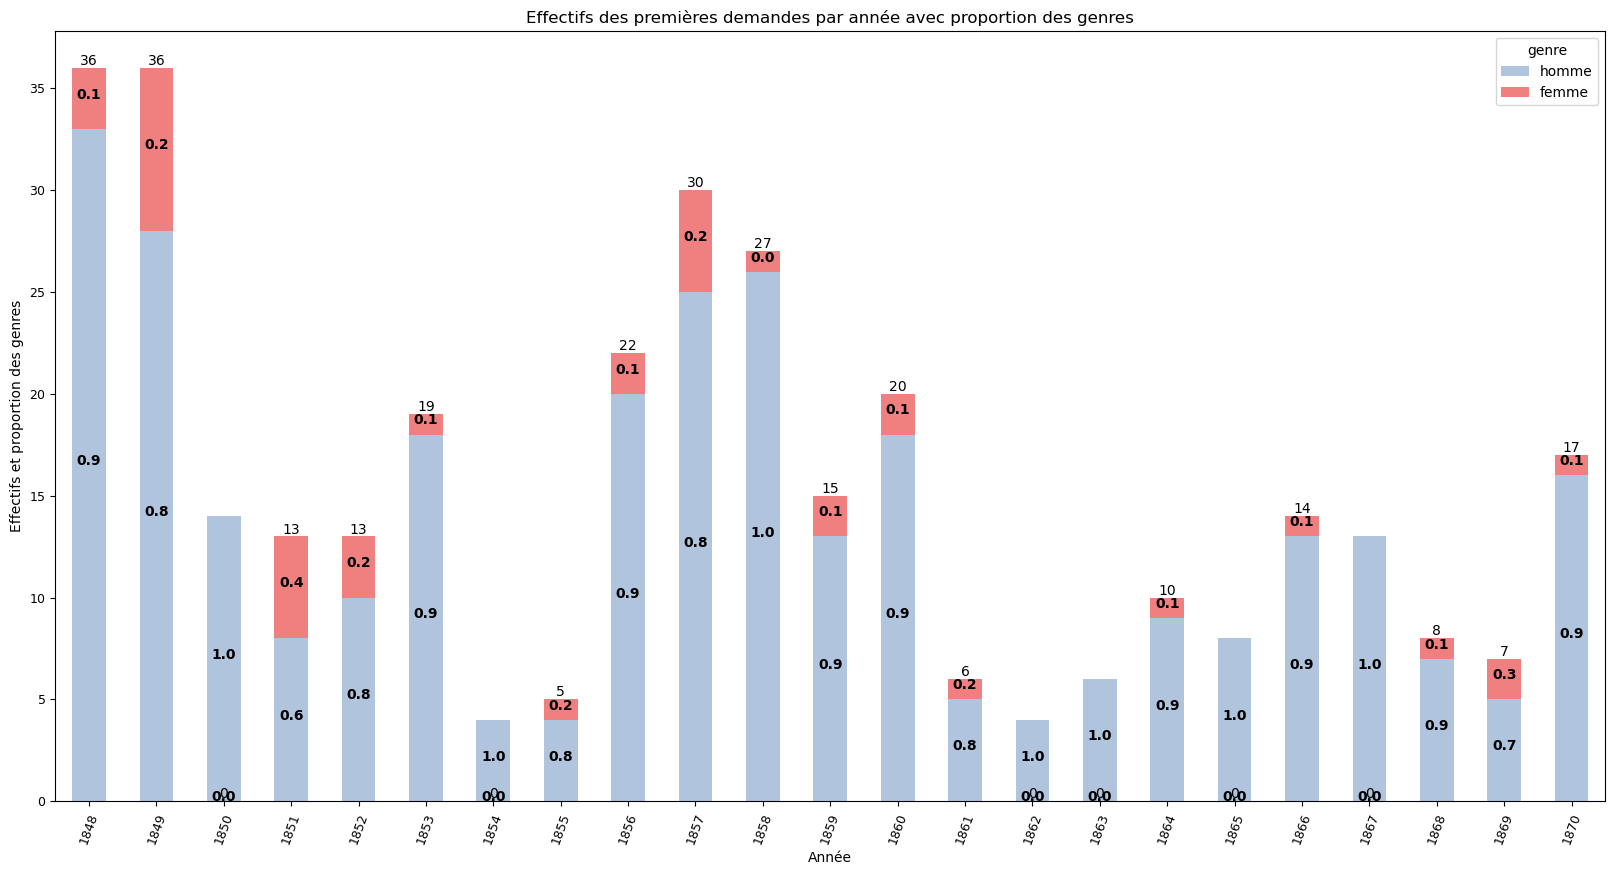

In [20]:
### Graphique avec la distribution par période et genre (M,F)
# Noter que les effectifs du genre 'Autres' étant très faibles,
# on ne les analyse pas de manière sérielle mais on peut les analyser qualitatiement


ax = ddf.plot.bar(stacked=True, y=['homme','femme'], \
                        rot=70, fontsize=9, figsize=(20,10), color=['LightSteelBlue', 'LightCoral'])


### https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/


## On ajoute une étiquette concernant la valeur de fréquence
# à chaque rectangle dans le graphe, en utilisant la list 'lp' préparée précédemment
# Il y a autant de triangles que les valeurs d'index x le nombre de variables
for bar,v in zip(ax.patches,lp): 

    ax.text(
      # Met les étiquette aux centre des rectangles
      bar.get_x() + bar.get_width() / 2,
        
      # Ajoute les coordonnées verticales
      bar.get_height()/2 + bar.get_y(), 
      
      # Ajoute les valeurs
      v,

      # centre et met du style aux étiquettes
      ha='center',
      color='black',
      weight='bold',
      size=10
  )


ax.bar_label(ax.containers[-1])


plt.ylabel('Effectifs et proportion des genres')
plt.xlabel('Année')
plt.title('Effectifs des premières demandes par année avec proportion des genres')


# Doc.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('images/distribution_annee_genre.jpg', bbox_inches='tight',
                      pad_inches=0.2)
plt.show()

""
conf
2003
2004
2005


In [69]:
df_conf= df_year.join(participants_number, how='left')
df_conf.reset_index(inplace=True)
df_conf

,conf,number
0,1985,33.0
1,1986,45.0
2,1987,NaN
3,1988,51.0
4,1989,52.0
5,1990,NaN
6,1991,47.0
7,1992,51.0
8,1993,NaN
9,1994,39.0


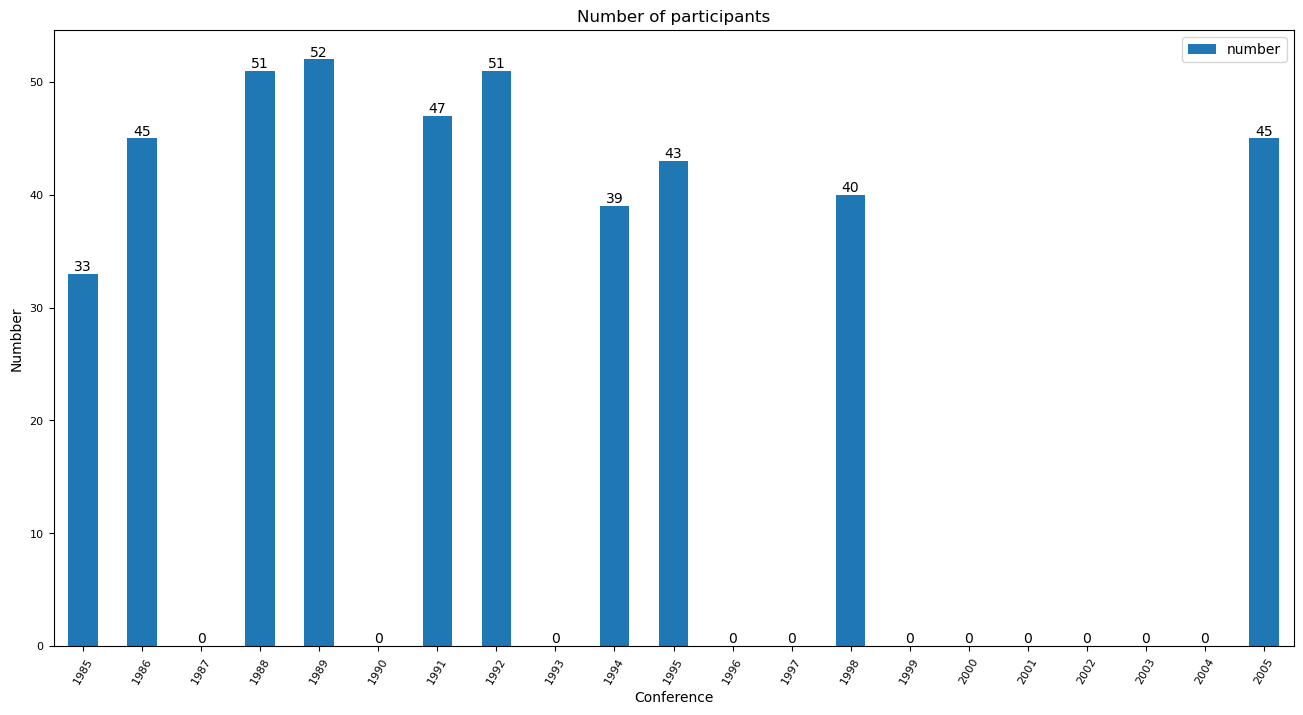

In [73]:
### Représentation graphique des effectifs par année

ax = df_conf.plot(x='conf', y='number', kind='bar',rot=60, fontsize=8, figsize=(16,8))

ax.bar_label(ax.containers[-1])
             
plt.ylabel('Numbber')
plt.xlabel('Conference')
plt.title('Number of participants')
plt.show()

### Genders distribution

In [78]:
query="""
-- Count the participants'gender and conference

SELECT DISTINCT p.pk_person, e.date conference, p.gender
FROM Person p 
	LEFT JOIN Participation pp on pp.fk_person = p.pk_person 
	LEFT JOIN Event e on pp.fk_event = e.pk_event 
WHERE e.description = 'Cortona'
--AND e.date BETWEEN 1986 AND 1998
"""

In [79]:
# Create a cursor
cur = cn.cursor()
cur.execute(query)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()

In [83]:
participants_gender = pd.DataFrame(r)
participants_gender.columns=['id_person', 'conf', 'gender']
participants_gender.tail()

,id_person,conf,gender
441,354,1995,m
442,355,1995,w
443,356,1995,m
444,357,1995,m
445,360,1995,m


In [130]:


### Tableau de contingence
X = "conf"
Y = "gender"  # "0"

ddf = participants_gender[[X,Y]].pivot_table(index=Y,columns=X,observed=True, aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int).transpose()
ddf = ddf[:-1]
ddf



gender,m,w,Total
conf,,,
1985,25,8,33
1986,30,15,45
1988,39,12,51
1989,33,19,52
1991,32,15,47
1992,32,19,51
1994,25,14,39
1995,27,16,43
1998,23,17,40
